In [1]:
import numpy as np
import pandas as pd

In [2]:
Mutual_Funds =pd.read_csv('/content/MutualFunds_Project1.csv')

#Shape

In [3]:
Mutual_Funds.shape

(23783, 106)

#How data is looking, Check is it conatining  Features like shapiro rtio,treynor ratio, std deviation (volatility), aplha,beta.

---



In [4]:
Mutual_Funds.head()

,fund_symbol,quote_type,region,currency,initial_investment,subsequent_investment,fund_category,fund_family,total_net_assets,year_to_date_return,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAAX,MutualFund,US,USD,1000.0,50.0,World Allocation,DWS,2.979347e+09,0.21026,...,11.31,0.66,6.44,-2.79,0.96,0.42,77.56,9.35,0.48,4.25
1,AAAEX,MutualFund,US,USD,1000000.0,NaN,Health,Virtus,1.953489e+08,0.19077,...,14.41,0.93,17.65,6.14,0.75,1.18,55.79,14.16,0.96,17.78
2,AAAFX,MutualFund,US,USD,2500.0,50.0,Target-Date 2015,American Century Investments,2.594600e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,USD,2000.0,50.0,Large Growth,Thrivent Funds,2.078607e+09,0.24559,...,16.66,1.30,22.10,0.91,1.08,1.40,85.76,15.80,1.03,15.02
4,AAAHX,MutualFund,US,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,2.594600e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Mutual_Funds.isnull().sum()

,0
fund_symbol,0
quote_type,0
region,0
currency,0
initial_investment,7298
...,...
fund_mean_annual_return_10years,7079
fund_r_squared_10years,7079
fund_stdev_10years,7072
fund_sharpe_ratio_10years,7089


In [6]:
null_categorical = Mutual_Funds.select_dtypes(include=['object']).isnull().sum()
print(null_categorical)


fund_symbol           0
quote_type            0
region                0
currency              0
fund_category       663
fund_family           0
investment_type    1109
size_type          1109
dtype: int64


In [7]:
null_categorical = Mutual_Funds.select_dtypes(include=['object']).nunique()
print(null_categorical)


fund_symbol        23783
quote_type             1
region                 1
currency               1
fund_category        119
fund_family          310
investment_type        3
size_type              3
dtype: int64


In [8]:
null_numerical = Mutual_Funds.select_dtypes(include=['float', 'int']).isnull().sum() / len(Mutual_Funds) * 100
print(null_numerical)


initial_investment                 30.685784
subsequent_investment              62.397511
total_net_assets                    0.142959
year_to_date_return                 1.686078
fund_yield                         21.431274
                                     ...    
fund_mean_annual_return_10years    29.764958
fund_r_squared_10years             29.764958
fund_stdev_10years                 29.735525
fund_sharpe_ratio_10years          29.807005
fund_treynor_ratio_10years         29.739730
Length: 98, dtype: float64


In [9]:
null_numerical = Mutual_Funds.select_dtypes(include=['float', 'int']).isnull().sum() / len(Mutual_Funds) * 100
null_numerical_greater_50 = null_numerical[null_numerical > 50]
print(null_numerical_greater_50)


subsequent_investment       62.397511
fund_bond_maturity          66.572762
fund_bond_duration          59.092629
fund_bonds_us_government    59.092629
fund_bonds_aaa              59.092629
fund_bonds_aa               59.092629
fund_bonds_a                59.092629
fund_bonds_bbb              59.092629
fund_bonds_bb               59.092629
fund_bonds_b                59.092629
fund_bonds_below_b          59.092629
fund_bonds_others           59.092629
dtype: float64


In [10]:
columns_to_drop = null_numerical_greater_50.index.tolist()

columns_to_drop.remove('subsequent_investment')
Mutual_Funds.drop(columns=columns_to_drop, inplace=True)


In [11]:
Mutual_Funds.shape

(23783, 95)

In [12]:
Mutual_Funds = Mutual_Funds.fillna(Mutual_Funds.select_dtypes(include=['float', 'int']).mean())


In [13]:
Mutual_Funds.isnull().sum()

,0
fund_symbol,0
quote_type,0
region,0
currency,0
initial_investment,0
...,...
fund_mean_annual_return_10years,0
fund_r_squared_10years,0
fund_stdev_10years,0
fund_sharpe_ratio_10years,0


In [14]:
numerical_columns = Mutual_Funds.select_dtypes(include=['float', 'int']).columns
print(numerical_columns)


Index(['initial_investment', 'subsequent_investment', 'total_net_assets',
       'year_to_date_return', 'fund_yield', 'last_dividend',
       'annual_holdings_turnover', 'fund_annual_report_net_expense_ratio',
       'category_annual_report_net_expense_ratio',
       'fund_prospectus_net_expense_ratio',
       'fund_prospectus_gross_expense_ratio', 'fund_year3_expense_projection',
       'fund_year5_expense_projection', 'fund_year10_expense_projection',
       'asset_cash', 'asset_stocks', 'asset_bonds', 'asset_others',
       'asset_preferred', 'asset_convertible', 'fund_sector_basic_materials',
       'fund_sector_communication_services', 'fund_sector_consumer_cyclical',
       'fund_sector_consumer_defensive', 'fund_sector_energy',
       'fund_sector_financial_services', 'fund_sector_healthcare',
       'fund_sector_industrials', 'fund_sector_real_estate',
       'fund_sector_technology', 'fund_sector_utilities',
       'fund_price_book_ratio', 'category_price_book_ratio',
       '

#Recomendation System

#


In [15]:
risk_metrics = Mutual_Funds[['fund_stdev_3years','fund_sharpe_ratio_3years','fund_treynor_ratio_3years','fund_stdev_5years','fund_sharpe_ratio_5years','fund_treynor_ratio_5years','fund_stdev_10years','fund_sharpe_ratio_10years','fund_treynor_ratio_10years']]



In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(risk_metrics)

# Convert normalized features into a DataFrame (optional for readability)
features_df = pd.DataFrame(normalized_features, columns=risk_metrics.columns)


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity matrix
similarity_matrix = cosine_similarity(normalized_features)


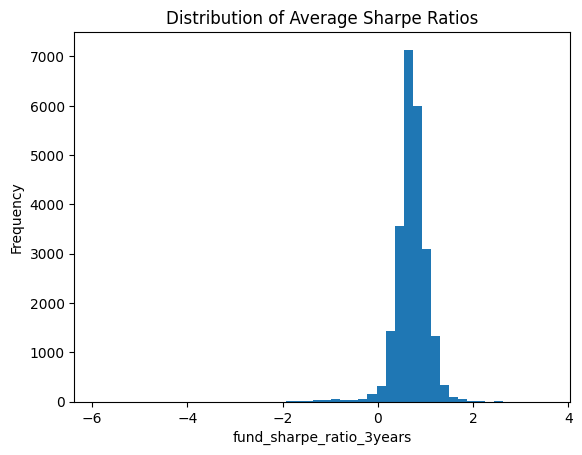

In [18]:
import matplotlib.pyplot as plt

# Plot the distribution of Sharpe ratios
plt.hist(Mutual_Funds['fund_sharpe_ratio_3years'], bins=50)
plt.xlabel('fund_sharpe_ratio_3years')
plt.ylabel('Frequency')
plt.title('Distribution of Average Sharpe Ratios')
plt.show()


In [19]:
low_threshold = Mutual_Funds['fund_sharpe_ratio_10years'].quantile(0.25)
medium_threshold = Mutual_Funds['fund_sharpe_ratio_10years'].quantile(0.75)
print("Low threshold:", low_threshold)
print("Medium threshold:", medium_threshold)

Low threshold: 0.66
Medium threshold: 0.82


In [20]:
def classify_risk(sharpe_ratio):
    if sharpe_ratio < low_threshold:
        return 'Low'
    elif low_threshold <= sharpe_ratio < medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Calculate average Sharpe Ratio
Mutual_Funds['average_sharpe'] = features_df[['fund_sharpe_ratio_3years', 'fund_sharpe_ratio_5years', 'fund_sharpe_ratio_10years']].mean(axis=1)

# Apply risk classification
Mutual_Funds['risk_level'] = Mutual_Funds['average_sharpe'].apply(classify_risk)


In [ ]:
#here we are making a recomendation  function based on user input risk level

def recommend_based_on_risk_level(risk_level, top_n=5):
    # here filtering mutual funds based on the risk levels
    risk_filtered_df = Mutual_Funds[Mutual_Funds['risk_level'] == risk_level]

    # If no funds match the risk level, return an empty list
    if risk_filtered_df.empty:
        return []

    # Extracting the indices for the filtered funds
    fund_indices = risk_filtered_df.index.tolist()

    # Compute the similarity scores for all funds in the filtered list
    # Create a matrix of similarities between filtered funds
    filtered_similarity_matrix = similarity_matrix[fund_indices, :][:, fund_indices]

    # do sumation of  similarity scores for each fund
    similarity_sums = filtered_similarity_matrix.sum(axis=1)

    # Get indices of the top_n most similar funds based on similarity sums
    top_indices = similarity_sums.argsort()[-top_n:][::-1]

    # Map these indices to original DataFrame indices
    recommended_funds = [fund_indices[i] for i in top_indices]

    # Select only the required columns
    columns_to_display = ['fund_symbol', 'fund_category', 'fund_family','fund_mean_annual_return_10years']
    recommendations_df = Mutual_Funds.loc[recommended_funds, columns_to_display]

    return recommendations_df

# Prompt the user for input
risk_level = input("Enter the risk level (Low, Medium, High): ").capitalize()  # Capitalize to match risk levels

# Get recommendations
recommendations = recommend_based_on_risk_level(risk_level)

# Display recommendations
if not recommendations.empty:
    print(f"Recommended funds with risk level '{risk_level}':")
    print(recommendations)
else:
    print("No recommendations found for the given risk level.")


Enter the risk level (Low, Medium, High): Medium
